# Task 3: Prediction using Decision Tree Algorithm

## By Hassan Farid

__Tasks to perform:__ 

1. Create the Decision Tree classifier and visualize it graphically
2. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly. 

__Algorithm used:__ Decision Tree

__Tools used:__ Python and Scikit-Learn

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt

# Loading Dataset

In [2]:
#Loading the iris dataset from provided source
iris_df = pd.read_csv("../Datasets/Iris.csv", index_col=False)
iris_df = iris_df[iris_df.columns[1:]]

In [3]:
#Creating dataframe for the iris dataset
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Splitting the Dataset:
Now that we have loaded the dataset, we need to create a decision tree classifier for it.

In [4]:
#Creating the feature vector
X = iris_df.iloc[:, [0,1,2,3]]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In case of labels, we are provided categorical values as labels, it would be better to convert these categorical values into a label column with numbers representing each of the species.

In [5]:
#Creating a new column in the dataframe to represent labels
iris_df["Labels"] = pd.Categorical(iris_df.Species)
iris_df.Labels = iris_df.Labels.cat.codes
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Labels
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [6]:
#Creating the labels for the features
y = np.array(iris_df['Labels'].values)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

In [7]:
#Now that we have the feature vectors and labels, lets split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
#Viewing the shape of the training and testing sets
print("Training dataset: X.shape={} , y.shape={}".format(X_train.shape, y_train.shape))
print("Testing dataset: X.shape={} , y.shape={}".format(X_test.shape, y_test.shape))

Training dataset: X.shape=(120, 4) , y.shape=(120,)
Testing dataset: X.shape=(30, 4) , y.shape=(30,)


# Creating Decision Tree Classifier
Now that the training and testing datasets have been formed, lets head to creating the Decision Tree Classifier and checking its accuracy

In [9]:
#Creating the Decision Tree Classifier on the training dataset
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [10]:
#Predicting labels from the test set
y_pred = tree_classifier.predict(X_test)
y_pred

array([2, 2, 0, 1, 1, 2, 1, 2, 1, 0, 0, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0,
       0, 1, 2, 1, 2, 1, 0, 2], dtype=int8)

### Computing F1-Score:
F1-score is a measure of accuracy of the Classifier. The closer the value of F1-score to 1.0, the more accurate the Regressor is. Technically speaking, F1-score is given by the formula:

> f1-score = 2(precision * recall)/(precision + recall) 

where

* precision = (True Positives)/(True Positives + False Positives)
* recall = (True Positives)/(True Positives + False Negatives)

Thus, a good F1-score indicates that we have low amount of false negatives as well as false positives, thus, giving us more accurate results.

In [11]:
#Viewing the f1_score of the classifier
f1_score(y_test, y_pred, average='weighted')

0.9333333333333333

Thus, we are getting F1-score of 0.933 which is pretty close to 1.0 and thus indicates a good classifier.

### Accuracy of the Classifier:
Accuracy is another metric to measure the quality of the created classifier. Accuracy measures the number of predictions that the model developed classifies correctly for given dataset. Formally, it can be defined as:

> Accuracy = Number of correct predictions / Number of total predicitions

In [12]:
#Viewing the average accuracy for the classifier
accuracy_score(y_test, y_pred)

0.9333333333333333

Thus, we are getting an overall accuracy of 93.33% which is not bad. 

# Visualizing the Decision Tree Classifier:
Last thing before we perform prediction on a new value, we can visualize the Decision Tree classifier that we created (giving us insights on how the process is being carried out inside)

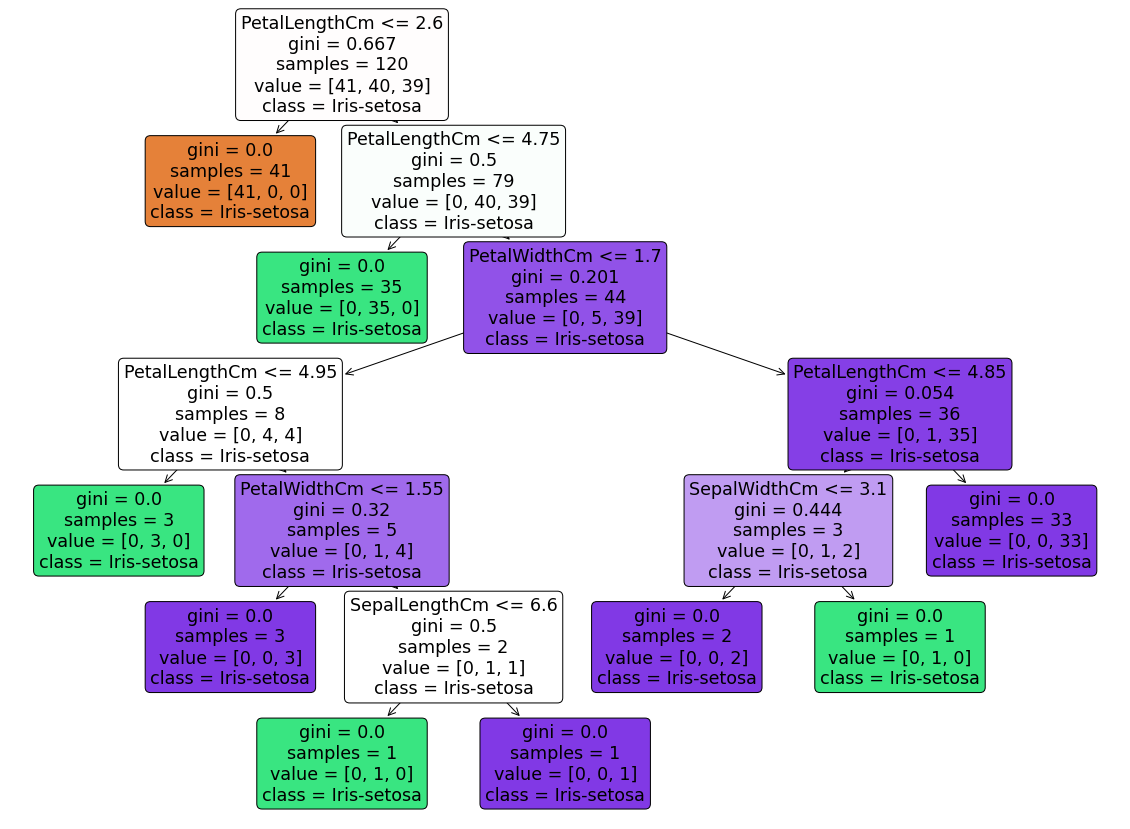

In [13]:
#Visualizing the trained Decision Tree
fig_size = plt.figure(figsize=(20,15))
_ = plot_tree(
    tree_classifier,
    feature_names = iris_df.columns[:4],
    class_names = np.array(iris_df.Species),
    rounded = True,
    filled = True
)

# Predicting using Classifier on New Values:
Now lets predict the results of the Classifier on new values other than that from the Dataset

In [14]:
#Creating a new feature vector
X_new = [[5, 1.5, 1.3, 0.2]] 

In [15]:
#Predicting the probabilites for this feature vector
tree_classifier.predict_proba(X_new)

array([[1., 0., 0.]])

In [16]:
#Predicting the class of the feature vector
tree_classifier.predict(X_new)

array([0], dtype=int8)

Thus, this classifier can now take any kind of new values and perform classification on it.